# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Estandarizacion de los datos
from sklearn.preprocessing import MinMaxScaler  ## Transforma los valores a [0,1]

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [2]:
ruta = "/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv"

# **1. EDA**

In [3]:
df = pd.read_csv(ruta, sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

<ipython-input-6-7053edd65b83>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

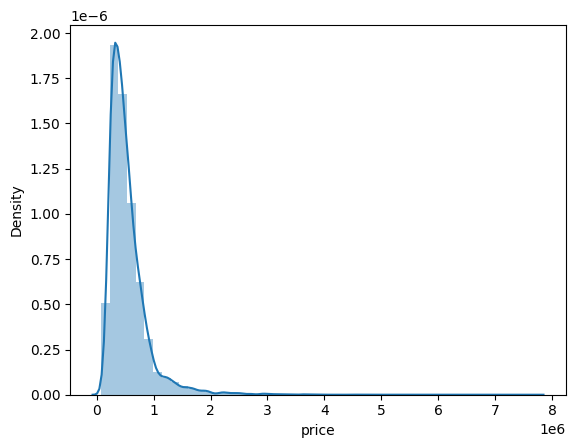

In [6]:
sns.distplot(df.price)

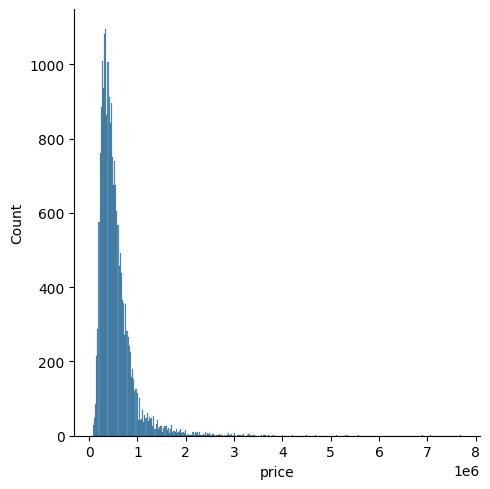

In [7]:
sns.displot(df.price)

In [8]:
df.drop("zipcode", axis=1, inplace=True) # 1 es columns y 0 es rows

In [9]:
df.date = pd.to_datetime(df.date)
df.date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [10]:
df["year"] = df.date.dt.year ## df.name.str.replace(..,..)
df["month"] = df.date.dt.month

df.drop("date", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year  

<Axes: >

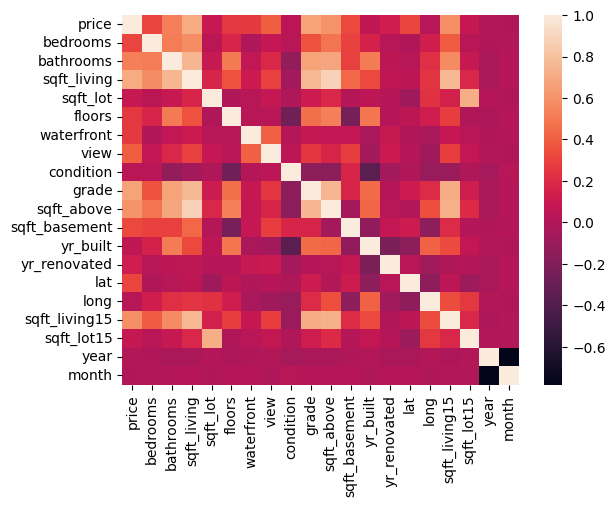

In [12]:
sns.heatmap(df.corr())

# **2. Entrenamiento del modelo**

In [13]:
X = df.drop("price", axis=1).values
y = df.price.values

In [14]:
X.shape, y.shape

((21597, 19), (21597,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
tf.random.set_seed(100)

In [18]:
## Arquitectura y compilacion
model = Sequential()
model.add(Dense(units=19, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1))

model.compile(loss = "mse", optimizer="Adam")

## Entrenamiento
model.fit(x=X_train_sc, y=y_train, epochs=100, validation_data=(X_test_sc, y_test), verbose=0)

In [19]:
hist = model.history.history
dfh = pd.DataFrame(hist)

<Axes: >

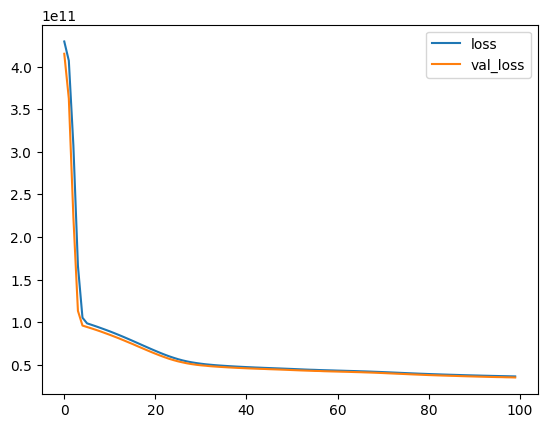

In [20]:
dfh.plot()

In [21]:
model.predict(X_test_sc)

203/203 [==============================] - 1s 4ms/step


array([[407677.2 ],
       [578305.4 ],
       [542699.5 ],
       ...,
       [361526.12],
       [576116.5 ],
       [703478.4 ]], dtype=float32)

In [23]:
y_pred = model.predict(X_test_sc)

203/203 [==============================] - 1s 3ms/step


In [25]:
y_pred.reshape(1,-1)[0]

array([407677.2 , 578305.4 , 542699.5 , ..., 361526.12, 576116.5 ,
       703478.4 ], dtype=float32)

In [27]:
dfy_pred = pd.Series(y_pred.reshape(1,-1)[0])
dfy_test = pd.Series(y_test)

In [30]:
df_eval = pd.concat([dfy_pred, dfy_test], axis=1, keys=["preds", "real"])
df_eval.head()

,preds,real
0,407677.1875,319000.0
1,578305.3750,464625.0
2,542699.5000,489950.0
3,382779.8750,395000.0
4,472933.8125,458000.0


In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(df_eval.real, df_eval.preds)

0.7350035274809175

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
np.sqrt(mean_squared_error(df_eval.real, df_eval.preds))

187464.34834887387

In [35]:
mean_absolute_error(df_eval.real, df_eval.preds)

112900.82467086228

In [37]:
df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64